<a href="https://colab.research.google.com/github/MigueLucena/Determinacion-Tipos-de-Estrellas/blob/main/Practica2NT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PABLO PÉREZ GARCÍA (100472243) MIGUEL LUCENA BELMONTE (100472277)**

**EJERCICIO 1: PROGRAMACIÓN DE K-MEANS Y COMPARACIÓN CON LA IMPLEMENTACIÓN DE SKLEARN**

*Usando el scaler StandardScaler:*

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    # Detectar columnas categóricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicamos codificación one-hot a las columnas categóricas
        encoder = OneHotEncoder(sparse_output=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalamos las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinamos los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data = load_data("stars_data.csv")


In [80]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

def kmeans_programada(data, n_clusters, max_iters=300):
  #Se inicializan los centroides aleatoriamente
  centroids = data[np.random.choice(data.shape[0], n_clusters, replace = False)]

  for _ in range(max_iters):
        # Asignamos cada punto al centroide más cercano
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Actualizamos los centroides como la media de los puntos asignados a ellos
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Si los centroides no cambian, salimos del bucle
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        return centroids, labels


#Especificamos el número de clusters con el que se va a trabajar
n_clusters = 3

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[-0.32954964  0.89537215  2.14987404 -1.34064627  0.05882353  0.14705882
   0.05882353  0.          0.67647059  0.05882353  0.          0.
   0.          0.          0.05882353  0.17647059  0.          0.02941176
   0.05882353  0.64705882  0.02941176]
 [ 1.37358755  1.31469661  0.02667468 -1.03430718  0.95238095  0.04761905
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.0952381   0.          0.
   0.          0.          0.9047619 ]
 [-0.28345115 -0.52231653 -0.45253691  0.54282241  0.08536585  0.20731707
   0.          0.00609756  0.54268293  0.06097561  0.07317073  0.00609756
   0.00609756  0.01219512  0.10365854  0.2195122   0.10365854  0.
   0.02439024  0.54268293  0.00609756]]
Etiquetas: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Como se puede observar, el coeficiente de silueta del kmeans de sklearn es mayor que el del kmeans que hemos programado, por tanto, el de sklearn es mejor.

*Sin usar ningún scaler:*

In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse_output=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])

        # Eliminamos las columnas originales no numéricas
        data = data.drop(non_numeric_columns, axis=1)

        # Añadimos los datos codificados al DataFrame original
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))
        data = pd.concat([data, encoded_columns], axis=1)

    return data.values

data_onehot = load_data("stars_data.csv")


In [82]:

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data_onehot, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data_onehot)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data_onehot, labels_custom)
silhouette_sklearn = silhouette_score(data_onehot, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[ 1.00100978e+04  7.18609857e+04  2.02206078e+02  5.21049778e+00
   2.08888889e-01  1.73333333e-01  0.00000000e+00  4.44444444e-03
   4.97777778e-01  4.44444444e-02  5.33333333e-02  4.44444444e-03
   4.44444444e-03  8.88888889e-03  7.55555556e-02  1.95555556e-01
   7.55555556e-02  4.44444444e-03  2.22222222e-02  4.88888889e-01
   1.37777778e-01]
 [ 1.26632222e+04  5.30968111e+05  8.57166667e+02 -8.32188889e+00
   5.55555556e-01  0.00000000e+00  2.22222222e-01  0.00000000e+00
   0.00000000e+00  2.22222222e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.22222222e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.11111111e-01  1.11111111e-01
   5.55555556e-01]
 [ 2.55250000e+04  7.96295333e+05  6.17833333e+02 -7.61500000e+00
   6.66666667e-01  3.33333333e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.33

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Como se puede observar, el coeficiente de silueta del kmeans de sklearn es mayor que el del kmeans que hemos programado, por tanto, el de sklearn es mejor.

**EJERCICIO 2: CODIFICACIÓN DE ONE-HOT ENCODING Y CODIFICACIÓN COMO VARIABLE ORDINAL**

Resultados del k-means de sklearn con one-hot encoding:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 2, Silhouette: 0.36863160516653415, Time: 0.017820119857788086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 3, Silhouette: 0.3704986158413902, Time: 0.12990188598632812
Clusters: 4, Silhouette: 0.32018215958073276, Time: 0.10212159156799316


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 5, Silhouette: 0.31645502528279285, Time: 0.12708139419555664
Clusters: 6, Silhouette: 0.2979517222989233, Time: 0.02703714370727539


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 7, Silhouette: 0.2783150923932704, Time: 0.027608871459960938
Clusters: 8, Silhouette: 0.27329897123462293, Time: 0.03182554244995117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 9, Silhouette: 0.25566332982793905, Time: 0.12700271606445312


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 10, Silhouette: 0.23755541538041758, Time: 0.1268618106842041


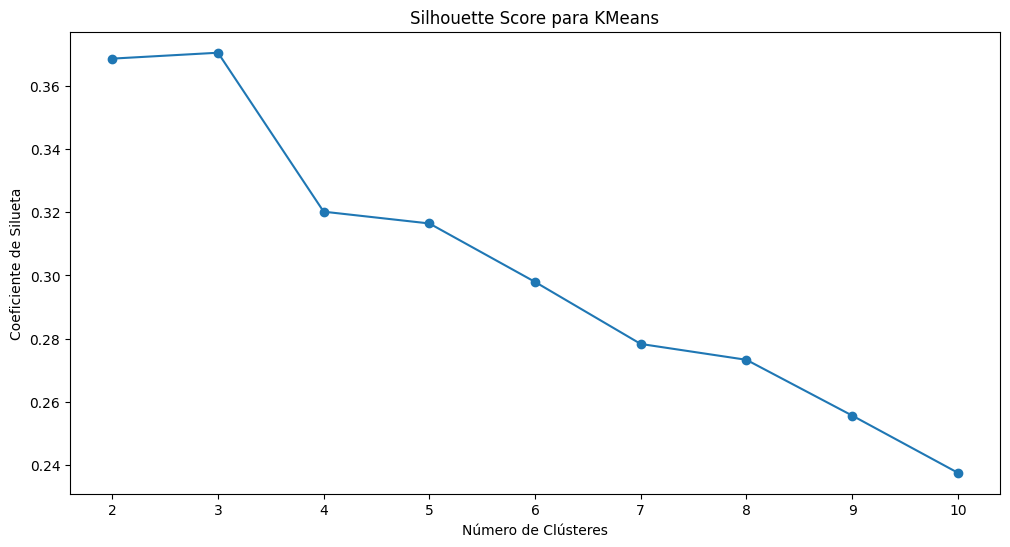

Número óptimo de clústeres según el coeficiente de silueta: 3

Resultados de K-Means usando el número óptimo de clústeres:
Etiquetas: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 2 2 0]
Coeficiente de silueta: 0.4460142098134909


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_clusters = 10

silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, max_clusters + 1)

for n_clusters in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data_onehot)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficamos el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.show()

# Encontramos el número óptimo de clústeres según el coeficiente de silueta
optimal_clusters = n_clusters_range[np.argmax(silhouette_values)]
print(f"Número óptimo de clústeres según el coeficiente de silueta: {optimal_clusters}")

# Ejecutamos KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters)
labels_optimal = kmeans_optimal.fit_predict(data)
silhouette_optimal = silhouette_score(data, labels_optimal)
print("\nResultados de K-Means usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)


Resultados del k-means de sklearn codificando como variable ordinal:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 2, Silhouette: 0.31806783476740474, Time: 0.022804737091064453
Clusters: 3, Silhouette: 0.3182330279362134, Time: 0.039794206619262695
Clusters: 4, Silhouette: 0.3088507163244399, Time: 0.07008647918701172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 5, Silhouette: 0.45015291991405315, Time: 0.05952572822570801
Clusters: 6, Silhouette: 0.46535775229057863, Time: 0.15385103225708008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 7, Silhouette: 0.48394351427410615, Time: 0.09576773643493652
Clusters: 8, Silhouette: 0.5043598950169446, Time: 0.10912799835205078


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 9, Silhouette: 0.5262296745239788, Time: 0.15969109535217285
Clusters: 10, Silhouette: 0.5238638336727951, Time: 0.21835923194885254


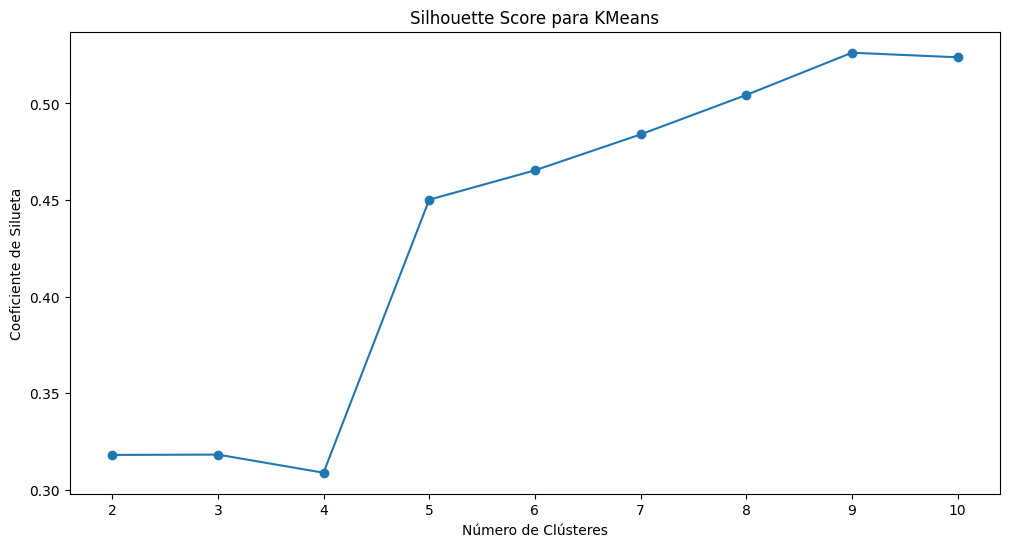

Número óptimo de clústeres según el coeficiente de silueta: 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Resultados de K-Means usando el número óptimo de clústeres:
Etiquetas: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 7 7 7 4 7 7 7 7 7 6 0 0 0 7 7 7
 7 7 7 8 8 8 8 8 8 8 8 8 6 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 7 7 7 4 4 7 4 4 7 4 7 7 7 7 0 0 7 7 0 6 6 5 6 1 1 1 6 1 6 6 3
 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 7 4 7
 7 4 6 0 0 0 0 0 0 0 0 6 6 1 1 1 1 1 1 6 1 1 3 3 3 5 3 3 1 3 0 5 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 0 0 0 0 6 6 0 0 0 7 6 1
 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 3 3 5]
Coeficiente de silueta: 0.5359101007318453


In [84]:
from sklearn.preprocessing import OrdinalEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data_ordinal = load_data("stars_data.csv")



start_time_ordinal = time.time()
kmeans_ordinal = KMeans(n_clusters=n_clusters)
labels_ordinal = kmeans_ordinal.fit_predict(data_ordinal)
end_time_ordinal = time.time()
ordinal_time = end_time_ordinal - start_time_ordinal

silhouette_ordinal = silhouette_score(data_ordinal, labels_ordinal)

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_clusters = 10

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, max_clusters + 1)

for n_clusters in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data_ordinal)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficamos el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.show()

# Encontramos el número óptimo de clústeres según el coeficiente de silueta
optimal_clusters = n_clusters_range[np.argmax(silhouette_values)]
print(f"Número óptimo de clústeres según el coeficiente de silueta: {optimal_clusters}")

# Ejecutamos KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters)
labels_optimal = kmeans_optimal.fit_predict(data)
silhouette_optimal = silhouette_score(data, labels_optimal)
print("\nResultados de K-Means usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)


Como se puede ver, el tiempo de ejecución usando el cifrado con OrdinalEncoder es menor que si usamos One-Hot Encoding, además, al realizar el cifrado de las variables categóricas con One-Hot Encoding se obtiene menor coeficiente de silueta, lo que nos indica que es más codificar con variables ordinales.

**EJERCICIO 3: APLICACIÓN DE ALGORITMOS DE CLUSTERING**

*Carga de datos aplicando One-Hot Encoding con PCA:*



In [85]:
from sklearn.decomposition import PCA

def load_data_onehot_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_onehot_pca = load_data_onehot_pca("stars_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Carga de datos usando OrdinalEncoder con PCA:*

In [86]:
def load_data_ordinal_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
    }

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_ordinal_pca = load_data_ordinal_pca("stars_data.csv")

*Aplicando Hierarchical Clustering:*

ONE-HOT ENCODING CON PCA:

Clusters: 2, Silhouette: 0.5112431491741848, Time: 0.005252838134765625
Clusters: 3, Silhouette: 0.5388572529098407, Time: 0.0038509368896484375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Clusters: 4, Silhouette: 0.5710533272099182, Time: 0.004878044128417969
Clusters: 5, Silhouette: 0.5830699996044733, Time: 0.003342151641845703
Clusters: 6, Silhouette: 0.6001518371341007, Time: 0.0033888816833496094
Clusters: 7, Silhouette: 0.5731658465383395, Time: 0.0034410953521728516
Clusters: 8, Silhouette: 0.5751520498753363, Time: 0.0034668445587158203
Clusters: 9, Silhouette: 0.5765173160723094, Time: 0.0032303333282470703
Clusters: 10, Silhouette: 0.5959350438474191, Time: 0.0036153793334960938


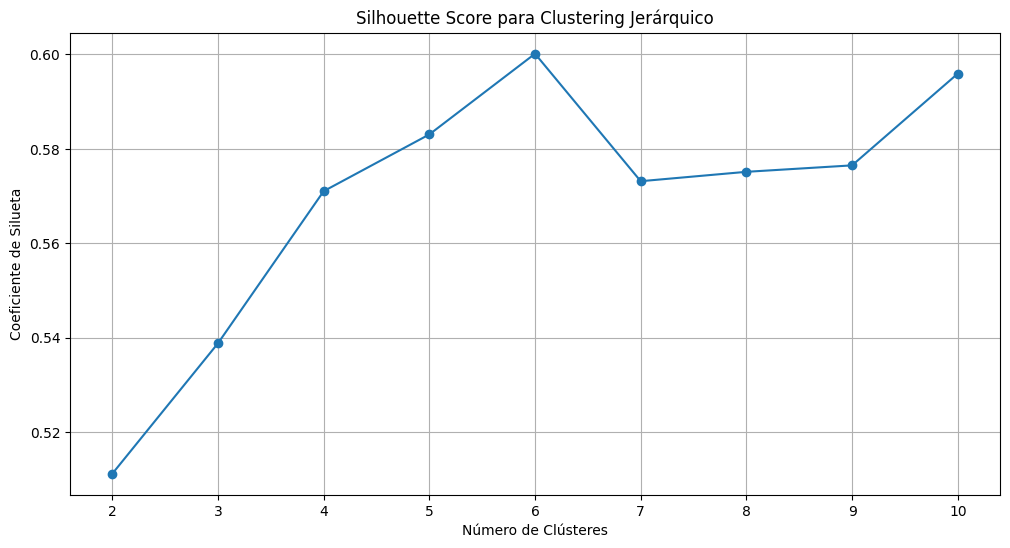

Número óptimo de clústeres según el método de Silhouette: 6

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 5 5 5 5 5 5 5 5 5 1 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 4 4 2 2 4 4 2 2 1 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
Coeficiente de silueta: 0.6001518371341007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


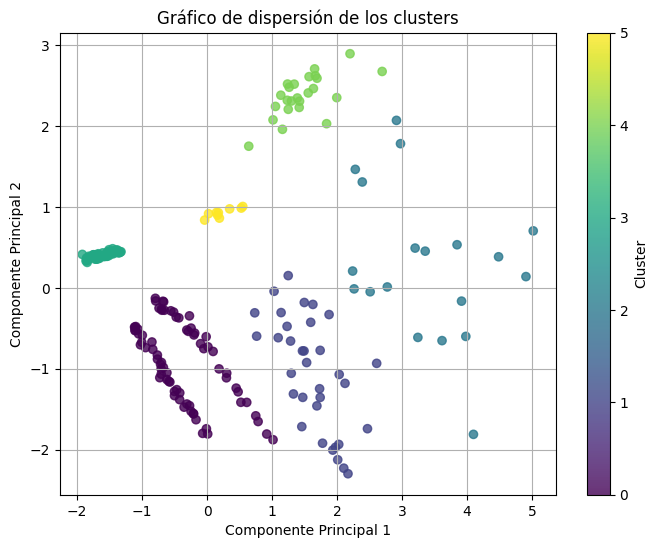

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np


# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_onehot_pca)

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_onehot_pca)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_onehot_pca, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficamos el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutamos clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_onehot_pca)
silhouette_optimal = silhouette_score(data_onehot_pca, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)

# Gráfico de dispersión con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Como se puede observar, hay una clara diferenciación entre clusters, ya que hay una correcta separación ellos. Este hecho nos lleva a pensar que se han identificado correctamente unos patrones distintos entre los datos y que estos (los datos) han sido separados de forma coherente, lo que facilita también mucho el estudio de los resultados. Cabe destacar que una buena diferenciación entre clusters, como es en este caso, podría indicar una buena selección de algoritmo de clustering.

Sin embargo, con respecto a la dispersión dentro del mismo cluster, es cierto que podemos encontrar una alta separación entre los datos del mismo cluster, lo que indica una alta variabilidad. Podría significar que existen ciertos subgrupos o subpoblaciones dentro del cluster, o incluso que el cluster contenga ciertos puntos de ruido, que nos lleva a pensar que no hay una estructura concreta dentro de él. Una alta dispersión dentro del mismo cluster podría estar señalando que no estamos eligiendo un buen método de clustering.

 ONE-HOT ENCODING SIN PCA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Clusters: 2, Silhouette: 0.7332432799660659, Time: 0.009229660034179688
Clusters: 3, Silhouette: 0.8095405196845682, Time: 0.004647254943847656
Clusters: 4, Silhouette: 0.7982962977095361, Time: 0.0045130252838134766
Clusters: 5, Silhouette: 0.8056926060104558, Time: 0.0047397613525390625
Clusters: 6, Silhouette: 0.8010147957047903, Time: 0.004529237747192383
Clusters: 7, Silhouette: 0.7976847416937763, Time: 0.00799870491027832
Clusters: 8, Silhouette: 0.7948442198084297, Time: 0.004691123962402344
Clusters: 9, Silhouette: 0.794583152550045, Time: 0.004634380340576172
Clusters: 10, Silhouette: 0.7897360436527132, Time: 0.004589557647705078


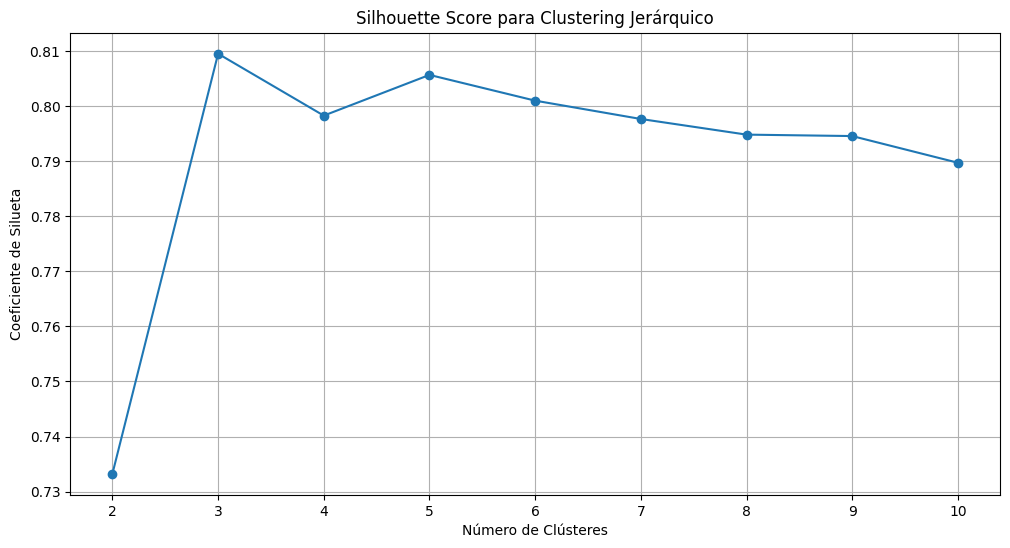

Número óptimo de clústeres según el método de Silhouette: 3

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 2 0 0 2 2 0 2 0 0 2 2 2 0 2 2 0 0]
Coeficiente de silueta: 0.8095405196845682


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import time


# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_onehot)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_onehot, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficamos el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutamos clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_onehot)
silhouette_optimal = silhouette_score(data_onehot, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)



ORDINAL ENCODING CON PCA:

Clusters: 2, Silhouette: 0.579279353961045, Time: 0.004162311553955078
Clusters: 3, Silhouette: 0.718971759949374, Time: 0.0038988590240478516
Clusters: 4, Silhouette: 0.7841045991929915, Time: 0.0036530494689941406
Clusters: 5, Silhouette: 0.7968932216601642, Time: 0.003650665283203125
Clusters: 6, Silhouette: 0.7895160678250802, Time: 0.0038154125213623047
Clusters: 7, Silhouette: 0.70798541112025, Time: 0.0036869049072265625
Clusters: 8, Silhouette: 0.7026811210422277, Time: 0.003774404525756836
Clusters: 9, Silhouette: 0.6588126150197738, Time: 0.0037469863891601562
Clusters: 10, Silhouette: 0.6592096385661587, Time: 0.0031037330627441406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

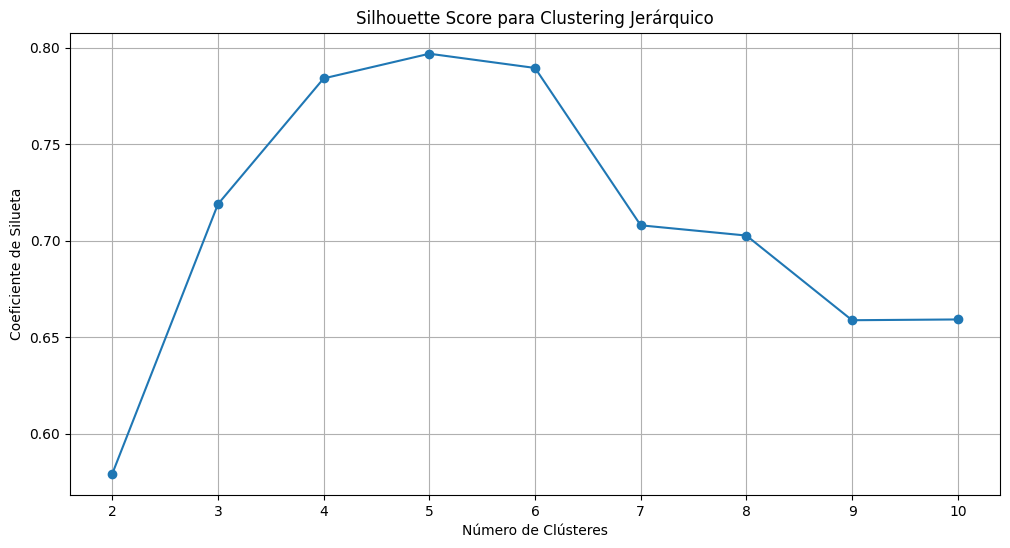

Número óptimo de clústeres según el método de Silhouette: 5

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 1 3 1 3 3 3 2 1 1 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 1 1 1 1 1 3 1 3 4 4 4 1 1 0 3 1 2 1 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3
 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 1 0 0 2 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 3 2 2
 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 3 3 2]
Coeficiente de silueta: 0.7968932216601642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


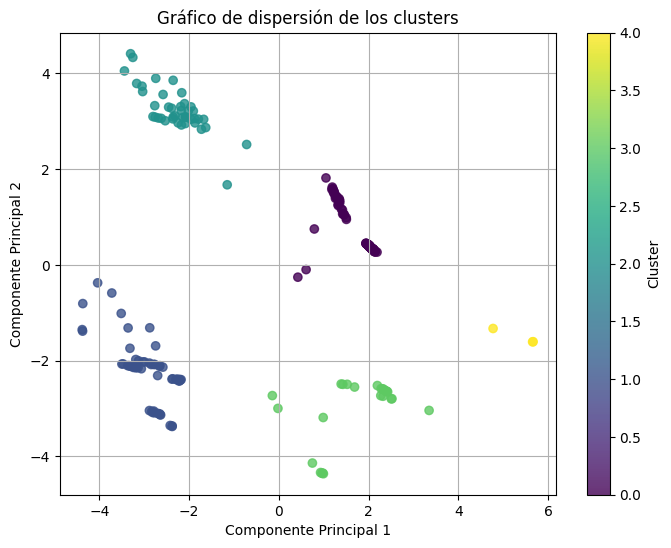

In [89]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np


# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_ordinal_pca)

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_ordinal_pca)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_ordinal_pca, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutamos clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_ordinal_pca)
silhouette_optimal = silhouette_score(data_ordinal_pca, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)

# Gráfico de dispersión con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Lo cierto es que la separación entre clusters es bastante grande, que como decíamos anteriormente, significa que se han identificado satisfactoriamente los diferencias entre patrones y datos distintos, facilitando así el estudio. Esto indica un buen proceso de clustering con los datos tratados.

En cuanto a la separación de los puntos dentro del mismo cluster, sigue existiendo cierta dispersión en algún cluster. En concreto, en uno de ellos se pueden observar claramente la existencia de 2 subpoblaciones, lo que señala la presencia de dos patrones de datos totalmente distintos. Sin embargo, con respecto a los otros clusters representados, se observa una baja dispersión, lo que nos hace reflexionar que podría ser un buen algoritmo de clustering para trabajar con estos datos.

ORDINAL ENCODING SIN PCA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Clusters: 2, Silhouette: 0.4560113096313317, Time: 0.007970571517944336
Clusters: 3, Silhouette: 0.5563104826690799, Time: 0.003751516342163086
Clusters: 4, Silhouette: 0.5846964157805797, Time: 0.003648519515991211
Clusters: 5, Silhouette: 0.654145990086268, Time: 0.0031065940856933594
Clusters: 6, Silhouette: 0.6561349865488268, Time: 0.0033168792724609375
Clusters: 7, Silhouette: 0.6473899596685092, Time: 0.00295257568359375
Clusters: 8, Silhouette: 0.6555865450248394, Time: 0.0031964778900146484
Clusters: 9, Silhouette: 0.6674068561958525, Time: 0.0035347938537597656
Clusters: 10, Silhouette: 0.6681806567805229, Time: 0.003426790237426758


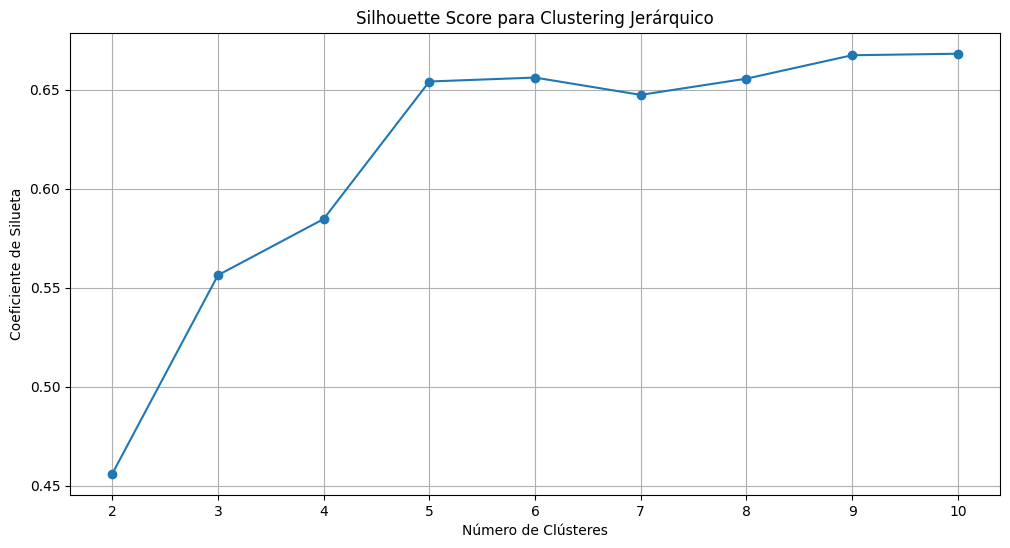

Número óptimo de clústeres según el método de Silhouette: 10

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 2 2 2 0 2 0 2 2 2 1 0 0 2 2 2 2
 2 2 2 7 7 7 7 7 7 7 7 7 0 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 2 2 0 0 0 0 0 2 0 2 8 8 8 0 0 4 2 0 1 0 1 1 1 1 1 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 3 3 5 3 3 1 5 5 5 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 1 1
 1 1 1 1 1 1 1 1 5 6 6 5 5 6 6 9 9 6]
Coeficiente de silueta: 0.6681806567805229


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import time


# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_ordinal)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_ordinal, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutamos clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_ordinal)
silhouette_optimal = silhouette_score(data_ordinal, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)



*Aplicando DBSCAN:*

ONE-HOT ENCODING CON PCA:

eps: 0.1, min_samples: 2, Silhouette: 0.34698574308627606, Time: 0.002981901168823242
eps: 0.1, min_samples: 3, Silhouette: 0.30301965715625034, Time: 0.003766298294067383
eps: 0.1, min_samples: 4, Silhouette: 0.25509153553094355, Time: 0.0025446414947509766
eps: 0.1, min_samples: 5, Silhouette: 0.2583377048612985, Time: 0.0027608871459960938
eps: 0.1, min_samples: 6, Silhouette: 0.22080246072389142, Time: 0.002483844757080078
eps: 0.1, min_samples: 7, Silhouette: 0.23174344327592739, Time: 0.002427816390991211
eps: 0.1, min_samples: 8, Silhouette: 0.23174344327592739, Time: 0.002286195755004883
eps: 0.1, min_samples: 9, Silhouette: 0.36620677514327676, Time: 0.002293825149536133
eps: 0.1, min_samples: 10, Silhouette: 0.36620677514327676, Time: 0.002358675003051758
eps: 0.2, min_samples: 2, Silhouette: 0.46750521259742495, Time: 0.0026803016662597656
eps: 0.2, min_samples: 3, Silhouette: 0.4409652800536598, Time: 0.002605915069580078
eps: 0.2, min_samples: 4, Silhouette: 0.408776276336

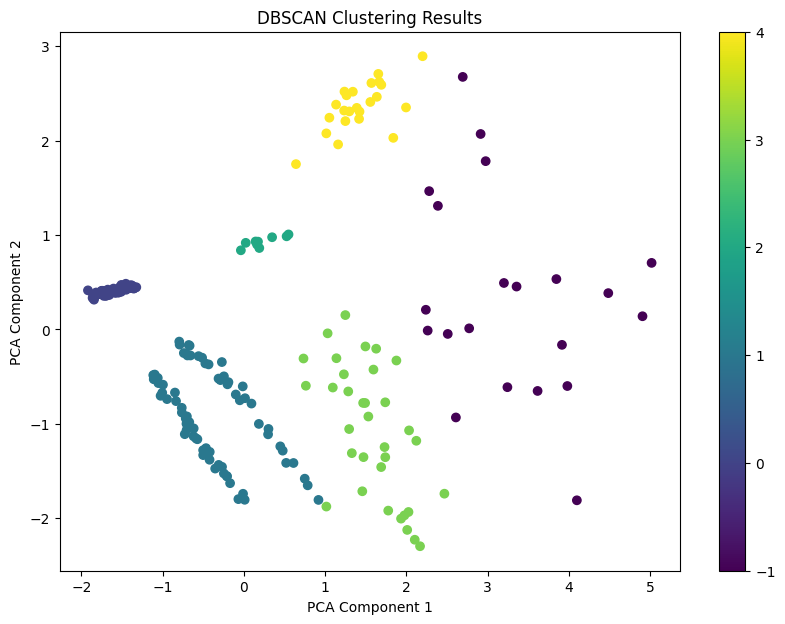

Resultados del clustering DBSCAN con parámetros óptimos:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  3  3  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  3  4  4  4 -1  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  3  3 -1  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  3  3  3  3  3  3  3  3  3
  3  3  4  4 -1 -1  4  4 -1 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  3
  1  1  1  1  3  3  3 -1  3  3 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Coeficiente de Silueta con parámetros óptimos: 0.5986486814391402


In [91]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Rango de valores de eps a probar
eps_range = np.arange(0.1, 1.0, 0.1)

# Rango de valores de min_samples a probar
min_samples_range = range(2, 11)

# Lista para almacenar los resultados del clustering
cluster_labels = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

for eps in eps_range:
    for min_samples in min_samples_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        start_time = time.time()
        labels = clustering.fit_predict(data_onehot_pca)
        end_time = time.time()
        execution_time = end_time - start_time
        silhouette = silhouette_score(data_onehot_pca, labels)
        silhouette_values.append(silhouette)
        cluster_labels.append(labels)
        execution_times.append(execution_time)
        print(f"eps: {eps}, min_samples: {min_samples}, Silhouette: {silhouette}, Time: {execution_time}")

# Encontramos el índice del mejor valor de coeficiente de silueta
optimal_index = np.argmax(silhouette_values)
optimal_eps_index = optimal_index // len(min_samples_range)
optimal_min_samples_index = optimal_index % len(min_samples_range)

optimal_eps = eps_range[optimal_eps_index]
optimal_min_samples = min_samples_range[optimal_min_samples_index]

print(f"Parámetros óptimos: eps={optimal_eps}, min_samples={optimal_min_samples}, Silhouette: {silhouette_values[optimal_index]}")

# Ejecutamos DBSCAN con los parámetros óptimos y mostrar resultados
optimal_clustering = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_clustering.fit_predict(data_onehot_pca)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_onehot_pca[:, 0], data_onehot_pca[:, 1], c=optimal_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimimos los resultados del clustering con los parámetros óptimos
print("Resultados del clustering DBSCAN con parámetros óptimos:")
print(optimal_labels)

# Imprimimos el coeficiente de silueta con los parámetros óptimos
print("Coeficiente de Silueta con parámetros óptimos:", silhouette_values[optimal_index])



Después de llevar a cabo la representación de los datos, nos damos cuenta que entre ciertos clusters no existe una gran dispersión, lo que nos indica que quizás no se han sabido diferenciar de la mejor manera los distintos datos y patrones.

Además, dentro de los propios clusters se encuentra una gran dispersión, lo que, además de dificultar el estudio de los datos, señala que existe una alta diferenciación en los valores dentro del mismo grupo. Esto y lo mencionado anteriormente, nos lleva a la teoría de que este método de clustering no sea el más indicado.

ONE-HOT ENCODING SIN PCA:

In [92]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time


# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Rango de valores de eps a probar
eps_range = np.arange(0.1, 1.0, 0.1)

# Rango de valores de min_samples a probar
min_samples_range = range(2, 11)

# Lista para almacenar los resultados del clustering
cluster_labels = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

for eps in eps_range:
    for min_samples in min_samples_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        start_time = time.time()
        labels = clustering.fit_predict(data_onehot)
        end_time = time.time()
        execution_time = end_time - start_time
        # Verificar si el número de etiquetas es mayor que 1
        if len(np.unique(labels)) > 1:
            silhouette = silhouette_score(data_onehot, labels)
            silhouette_values.append(silhouette)
            cluster_labels.append(labels)
            execution_times.append(execution_time)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette: {silhouette}, Time: {execution_time}")
        else:
            print(f"eps: {eps}, min_samples: {min_samples}, Number of labels is 1, Skipping...")


# Encontramos el índice del mejor valor de coeficiente de silueta
optimal_index = np.argmax(silhouette_values)
optimal_eps_index = optimal_index // len(min_samples_range)
optimal_min_samples_index = optimal_index % len(min_samples_range)

optimal_eps = eps_range[optimal_eps_index]
optimal_min_samples = min_samples_range[optimal_min_samples_index]

print(f"Parámetros óptimos: eps={optimal_eps}, min_samples={optimal_min_samples}, Silhouette: {silhouette_values[optimal_index]}")

# Ejecutamos DBSCAN con los parámetros óptimos y mostrar resultados
optimal_clustering = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_clustering.fit_predict(data_onehot)


# Imprimimos los resultados del clustering con los parámetros óptimos
print("Resultados del clustering DBSCAN con parámetros óptimos:")
print(optimal_labels)

# Imprimimos el coeficiente de silueta con los parámetros óptimos
print("Coeficiente de Silueta con parámetros óptimos:", silhouette_values[optimal_index])


eps: 0.1, min_samples: 2, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 3, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 4, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 5, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 6, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 7, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 8, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 9, Number of labels is 1, Skipping...
eps: 0.1, min_samples: 10, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 2, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 3, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 4, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 5, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 6, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 7, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 8, Number of labels is 1, Skipping...
eps: 0.2, min_samples: 

ORDINAL ENCODING CON PCA:

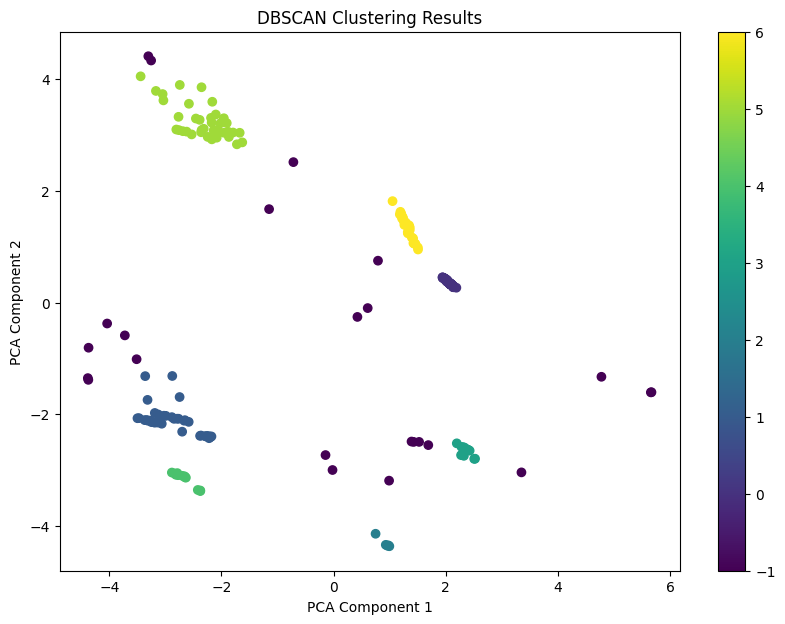

Resultados del clustering DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2 -1  2
  1  3  4  3  3 -1  5  1  1 -1  3  2  3  3  3  3  6  6  6  6  6  6  6  6
  6 -1  6  6  6 -1  6  6  6  6  6  6  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3 -1  2  1  1  4  1  1 -1  1  3 -1 -1 -1  4  4
 -1  3  4  5 -1  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6 -1  6 -1  6
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  4  1 -1  2  1  1  4  4  1  1  1  1  1  4  5  5  5  5  5  5  5  5  5
  5  5  6  6 -1 -1  6  6  5  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  4  4  1  5  5
  4  1  1  3  5  5  5  5  5  5  5  5  5  5 -1  5 -1 -1 -1  5 -1 -1 -1  5]
Coeficiente de Silueta: 0.6519124562984733


In [93]:
# Aplicamos el algoritmo DBSCAN
eps = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para ser considerado core point
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels_ordinal_pca = clustering.fit_predict(data_ordinal_pca)

# Calculamos el coeficiente de silueta (opcional)
silhouette_avg = silhouette_score(data_ordinal_pca, labels_ordinal_pca)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_ordinal_pca[:, 0], data_ordinal_pca[:, 1], c=labels_ordinal_pca, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimimos los resultados del clustering
print("Resultados del clustering DBSCAN:")
print(labels_ordinal_pca)

print("Coeficiente de Silueta:", silhouette_avg)

Como se puede observar en la gráfica, la elección de esta forma de tratar los datos resulta ser bastante decepcionante, ya que no existe una gran separación entre clusters (no se han conseguido diferenciar bien los patrones entre sí) y además dentro de los propios clusters, existe una gran dispersión lo que dificulta muchísimo el estudio de los datos. LLegamos a la conclusión de que este método de clustering tratado con estos datos no es el más correcto.

ORDINAL ENCODING SIN PCA:

In [94]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time


# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Rango de valores de eps a probar
eps_range = np.arange(0.1, 1.0, 0.1)

# Rango de valores de min_samples a probar
min_samples_range = range(2, 11)

# Lista para almacenar los resultados del clustering
cluster_labels = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

for eps in eps_range:
    for min_samples in min_samples_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        start_time = time.time()
        labels = clustering.fit_predict(data_ordinal)
        end_time = time.time()
        execution_time = end_time - start_time
        silhouette = silhouette_score(data_ordinal, labels)
        silhouette_values.append(silhouette)
        cluster_labels.append(labels)
        execution_times.append(execution_time)
        print(f"eps: {eps}, min_samples: {min_samples}, Silhouette: {silhouette}, Time: {execution_time}")

# Encontramos el índice del mejor valor de coeficiente de silueta
optimal_index = np.argmax(silhouette_values)
optimal_eps_index = optimal_index // len(min_samples_range)
optimal_min_samples_index = optimal_index % len(min_samples_range)

optimal_eps = eps_range[optimal_eps_index]
optimal_min_samples = min_samples_range[optimal_min_samples_index]

print(f"Parámetros óptimos: eps={optimal_eps}, min_samples={optimal_min_samples}, Silhouette: {silhouette_values[optimal_index]}")

# Ejecutamos DBSCAN con los parámetros óptimos y mostrar resultados
optimal_clustering = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_clustering.fit_predict(data_ordinal)


# Imprimimos los resultados del clustering con los parámetros óptimos
print("Resultados del clustering DBSCAN con parámetros óptimos:")
print(optimal_labels)

# Imprimimos el coeficiente de silueta con los parámetros óptimos
print("Coeficiente de Silueta con parámetros óptimos:", silhouette_values[optimal_index])


eps: 0.1, min_samples: 2, Silhouette: 0.011963566861826225, Time: 0.018822193145751953
eps: 0.1, min_samples: 3, Silhouette: 0.028282658861859256, Time: 0.004754543304443359
eps: 0.1, min_samples: 4, Silhouette: 0.1570661445020683, Time: 0.0038743019104003906
eps: 0.1, min_samples: 5, Silhouette: 0.19096467802079703, Time: 0.011171817779541016
eps: 0.1, min_samples: 6, Silhouette: 0.19096467802079703, Time: 0.004029750823974609
eps: 0.1, min_samples: 7, Silhouette: 0.19096467802079703, Time: 0.0036344528198242188
eps: 0.1, min_samples: 8, Silhouette: 0.19096467802079703, Time: 0.003316640853881836
eps: 0.1, min_samples: 9, Silhouette: 0.19096467802079703, Time: 0.003478527069091797
eps: 0.1, min_samples: 10, Silhouette: 0.15756046214988817, Time: 0.0036144256591796875
eps: 0.2, min_samples: 2, Silhouette: 0.3616678790422601, Time: 0.004033327102661133
eps: 0.2, min_samples: 3, Silhouette: 0.17526637773947779, Time: 0.011371135711669922
eps: 0.2, min_samples: 4, Silhouette: 0.2375183839

*Aplicando KMeans:*

ONE-HOT ENCODING CON PCA:

Clusters: 2, Silhouette Score: 0.5232829844586713
Clusters: 3, Silhouette Score: 0.5708831255231094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 4, Silhouette Score: 0.5815981247714684
Clusters: 5, Silhouette Score: 0.6024652380940644
Clusters: 6, Silhouette Score: 0.620794824583758
Clusters: 7, Silhouette Score: 0.6178967066123209


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 8, Silhouette Score: 0.6057060423085371


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 9, Silhouette Score: 0.6003067050145854
Clusters: 10, Silhouette Score: 0.5996731229813671


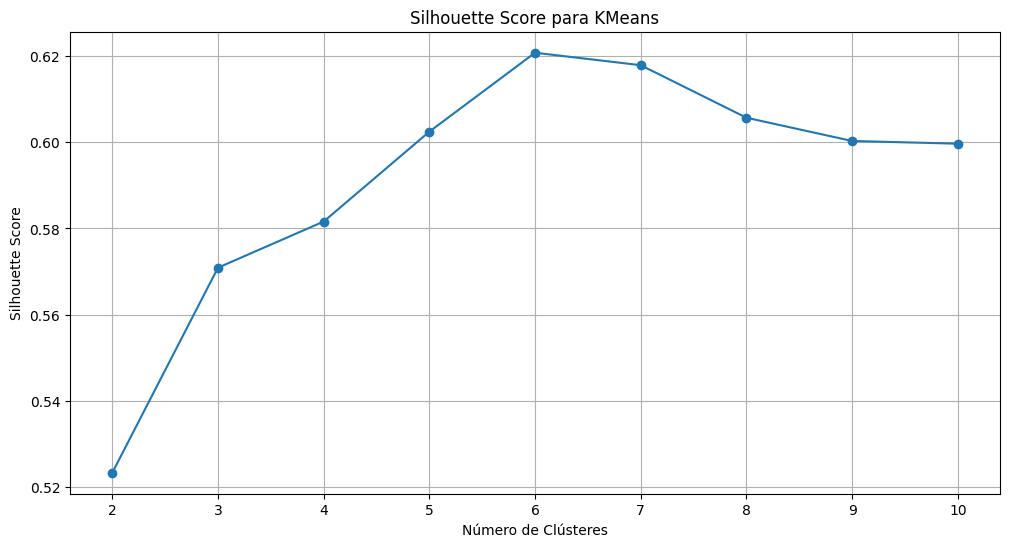

Número óptimo de clústeres según el Silhouette Score: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


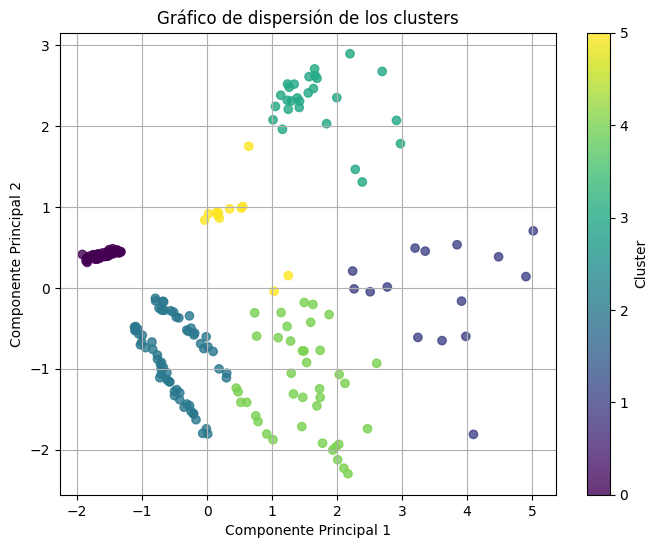

Resultados del clustering K-means con el número óptimo de clústeres:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2
 2 2 2 5 5 5 5 5 5 5 5 5 4 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 1 4 4 4 4 4 4 4 4 3
 3 3 3 3 3 3 5 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 4 2 2 2 4 4 4 4 2 4 4 4 4 5 4 4 4 4 4 4 3 3 3 1 3 3 1 3 5 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 4 2 4 2 2 4 4
 4 4 4 4 1 1 4 1 1 1 1 1 1 1 1 3 3 1]


In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicamos PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_onehot_pca)

# Lista para almacenar los valores de silueta
silhouette_scores = []

# Rango de número de clústeres a probar (desde 2)
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_onehot_pca)
    silhouette_avg = silhouette_score(data_onehot_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el Silhouette Score
optimal_index = np.argmax(silhouette_scores)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el Silhouette Score: {optimal_clusters}")

# Ejecutamos KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(data_onehot_pca)

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Imprimimos los resultados del clustering con el número óptimo de clústeres
print("Resultados del clustering K-means con el número óptimo de clústeres:")
print(labels_optimal)



En este caso, como se puede observar en la gráfica, si tenemos en cuenta primeramente la separación entre clusters, la realidad es que no existe una gran dispersión, lo que nos indica que quizás no hay una gran diferenciación entre patrones, lo que complica el análisis de datos.
Sin embargo, a la hora de valorar la representación de los datos del mismo cluster, es cierto que no sería el peor método de clustering, sin embargo, se siguen encontrando ciertas subpoblaciones dentro del mismo cluster lo que dificulta el proceso.

ORDINAL ENCODING CON PCA:

Clusters: 2, Silhouette Score: 0.579279353961045
Clusters: 3, Silhouette Score: 0.7245008319265978
Clusters: 4, Silhouette Score: 0.7841045991929915
Clusters: 5, Silhouette Score: 0.7968932216601642
Clusters: 6, Silhouette Score: 0.7902004783694271
Clusters: 7, Silhouette Score: 0.7289395812741956
Clusters: 8, Silhouette Score: 0.7216844521243736
Clusters: 9, Silhouette Score: 0.6686369519113992
Clusters: 10, Silhouette Score: 0.6821984366958467


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

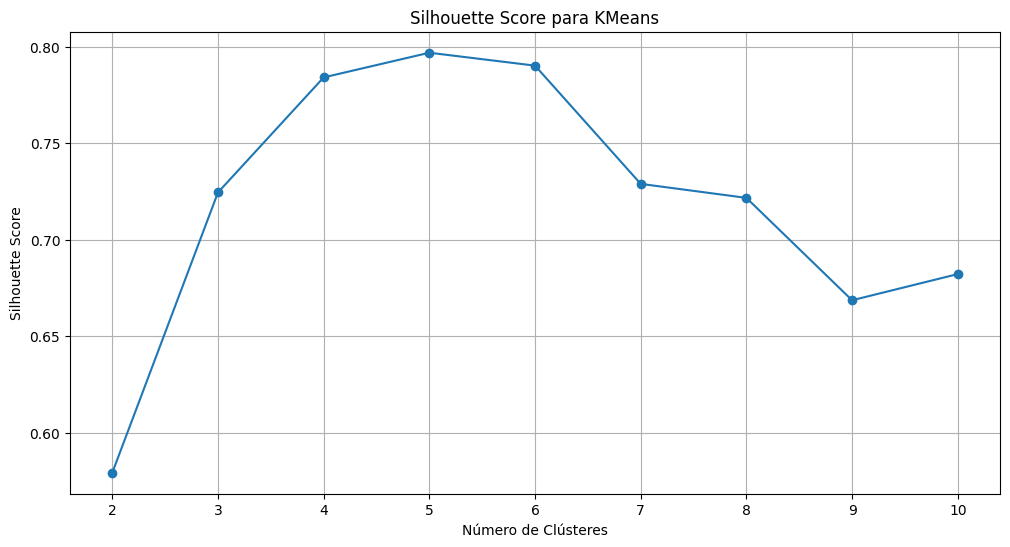

Número óptimo de clústeres según el Silhouette Score: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


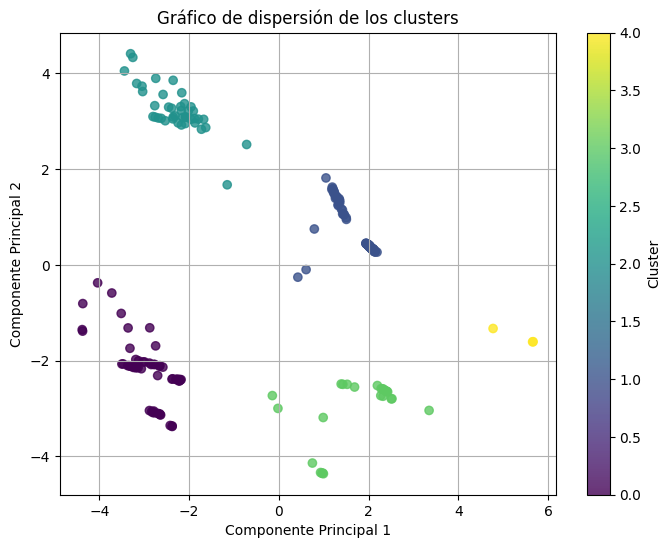

Resultados del clustering K-means con el número óptimo de clústeres:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 3 0 3 0 3 3 3 2 0 0 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 3 0 0 0 0 0 3 0 3 4 4 4 0 0 1 3 0 2 0 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3
 3 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 1 1 2 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 3 2 2
 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 3 3 2]


In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicamos PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_ordinal_pca)

# Lista para almacenar los valores de silueta
silhouette_scores = []

# Rango de número de clústeres a probar (desde 2)
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_ordinal_pca)
    silhouette_avg = silhouette_score(data_ordinal_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontramos el número óptimo de clústeres según el Silhouette Score
optimal_index = np.argmax(silhouette_scores)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el Silhouette Score: {optimal_clusters}")

# Ejecutamos KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(data_ordinal_pca)

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Imprimimos los resultados del clustering con el número óptimo de clústeres
print("Resultados del clustering K-means con el número óptimo de clústeres:")
print(labels_optimal)


En este caso, si lo comparamos con el caso anterior, lo cierto es que teniendo en cuenta la dispersión entre clusters, se podría decir que se mejora en este aspecto. Además, en cuanto a la representación de los datos dentro del mismo cluster, se ha mejorado en términos de dispersión, ya que ciertos clusters que tenían una gran diferenciación entre datos y que contaban con algunas subpoblaciones, ahora no las tienen.

**EJERCICIO 4: DISCUSIÓN DE LOS RESULTADOS**

Ahora llega el momento de sacar conclusiones después de haber aplicado hasta tres métodos diferentes de clustering sobre nuestro conjunto de datos.
En cada uno de los algoritmos que hemos utilizado (KMeans, Hierarchical Clustering, DBScan), se ha probado con los dos tipos de codificaciones que hemos estado utilizando durante el proyecto para las variables categóricas, One-hot Encoding y Ordinal Variable Encoding.
Después de analizar los resultados con las representaciones gráficas que hemos realizado, en concreto, con los gráficos de dispersión y con los coeficientes de silueta de dichos resultados, cabe destacar primeramente la importancia del número de clusters, ya que dependiendo de la cantidad que se utilicen con cada método, los resultados varían mucho. Sin embargo, en el caso de que el equipo tuviera que elegir una manera de codificar variables categóricas, sería codificándolas como variables ordinales, a pesar de que en la mejor combinación de algoritmos y formas de codificación que usaremos sea usando one-hot.
La razón de que pensamos que es mejor ordinal variable encoding es que, primeramente, los resultados suelen ser mejores con respecto al coeficiente de silueta. Por otro lado, cabe destacar que los modelos son más interpretables, ya que la codificación ordinal asigna valores numéricos a las categorías en función de su orden, y además la codificación ordinal reduce la dimensionalidad respecto al one-hot encoding.

**EJERCICIO 5 y 6: PIPELINE DE CLUSTERING RECOMENDADO Y COMPARACIÓN DE LOS RESULTADOS OBTENIDOS CON LOS DE LA TABLA**



In [97]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.sparse import hstack

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    # Mapeo de colores
    mapping = {
        'Red' : ['Red'],
        'Orange-Red': ['Orange-Red'],
        'Orange': ['Orange'],
        'Yellow-Orange': ['Pale yellow orange'],
        'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
        'White': ['White', 'Whitish', 'white'],
        'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
        'Blue': ['Blue'],
    }
    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    return data

def create_pipeline():
    # Definir las columnas categóricas y numéricas
    categorical_columns = ['Color', 'Spectral_Class']  # Ajusta esto según tus datos
    numeric_columns = ['Temperature', 'L', 'R', 'A_M']  # Ajusta esto según tus datos

    # Definir preprocesamiento para columnas categóricas
    categorical_transformer = Pipeline(steps=[
        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))  # Aquí se hace el cambio a OneHotEncoder
    ])

    # Definir preprocesamiento para columnas numéricas
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Combinar preprocesamientos
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_columns),
            ('num', numeric_transformer, numeric_columns)
        ], remainder='passthrough')  # Se mantiene el resto de las columnas sin transformación

    # Definir el pipeline completo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward'))
    ])

    return pipeline

# Cargar datos
data = load_data("stars_data.csv")

# Preprocesar datos
data = preprocess_data(data)

# Crear pipeline
pipeline = create_pipeline()

# Preprocesar datos y convertirlos a matriz densa
X_processed = pipeline.named_steps['preprocessor'].fit_transform(data)

# Convertir a matriz densa
X_processed_dense = X_processed.toarray()

# Entrenar pipeline
cluster_labels = pipeline.named_steps['clustering'].fit_predict(X_processed_dense)

# Calcular características promedio para columnas numéricas
numeric_features = data.select_dtypes(include=np.number)
numeric_features['Cluster'] = cluster_labels
numeric_means = numeric_features.groupby('Cluster').mean()

# Calcular moda para columnas categóricas
categorical_features = data.select_dtypes(include='object')
categorical_features['Cluster'] = cluster_labels
categorical_modes = categorical_features.groupby('Cluster').agg(lambda x: x.mode().iloc[0])

# Combinar características promedio y moda en un dataframe
cluster_features = pd.concat([numeric_means, categorical_modes], axis=1)

print(cluster_features)


          Temperature              L           R        A_M       Color  \
Cluster                                                                   
0        14702.352941  299051.894118  667.790435  -7.806553        Blue   
1        13578.933333    4077.273978    1.831388   6.815907  Blue-White   
2         3140.887500       0.003050    0.229080  15.051737         Red   

        Spectral_Class  
Cluster                 
0                    O  
1                    B  
2                    M  


Como se puede observar en los resultados obtenidos para los 3 clusters (era el mejor número de clusters para nuestra mejor combinación), encontramos valores de todo tipo, pero comparando con los de la tabla del enunciado, nos cuadran bastante los valores, ya que todos se encuenran dentro de los "rangos" establecidos en la tabla proporcionada.

Por un lado, con respecto a las variables numéricas, tanto los resultados pequeños como los grandes son realistas, ya que todos tienen algún valor "parecido" en la tabla del enunciado dentro de su misma columna.

Y con las variables categóricas ocurre algo parecido, estas obtienen colores que estan dentro de los valores que han sido mapeados al inicio de la práctica.